In [1]:
var openDigger = require('../src/open_digger');

In [2]:
var query = openDigger.driver.clickhouse.query;
query(    
    `SHOW DATABASES`
).then(
    res=>{  console.log(res); }
)

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


### 1.1 每月新增的star数

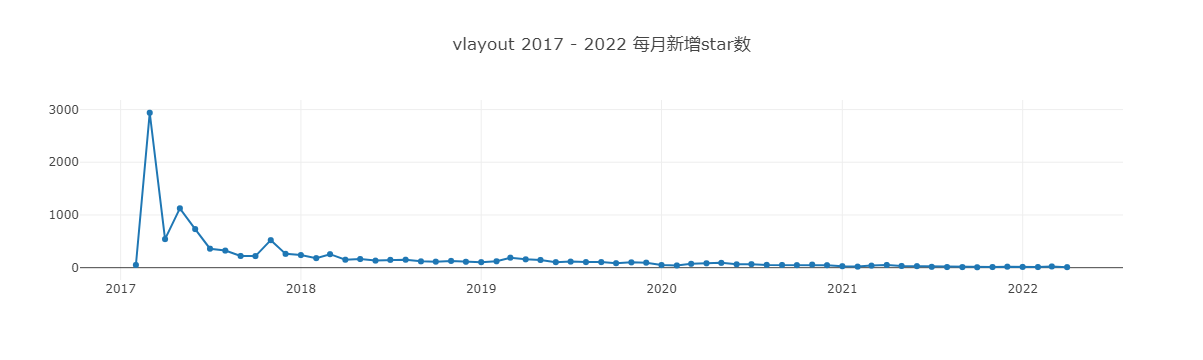

In [4]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='WatchEvent'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d => d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月新增star数`});  
})

### 1.2 每月新的fork数

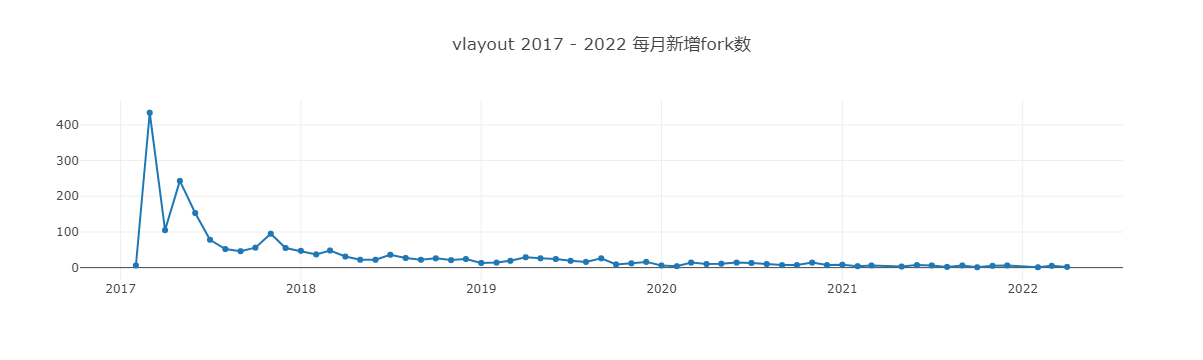

In [5]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='ForkEvent'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d => d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月新增fork数`});  
})

### 2.1 每月打开的issue个数

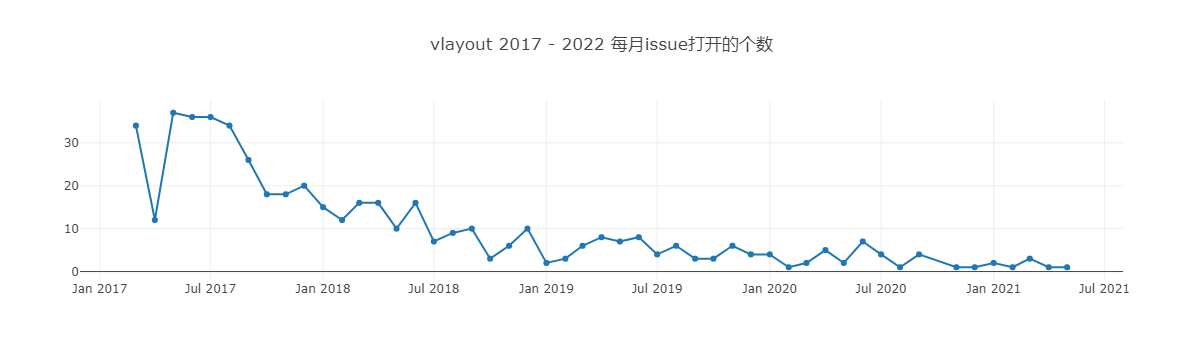

In [7]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='IssuesEvent'
    and action in ['opened', 'reopened']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月issue打开的个数`});  
})

### 2.2 每月关闭的issue个数

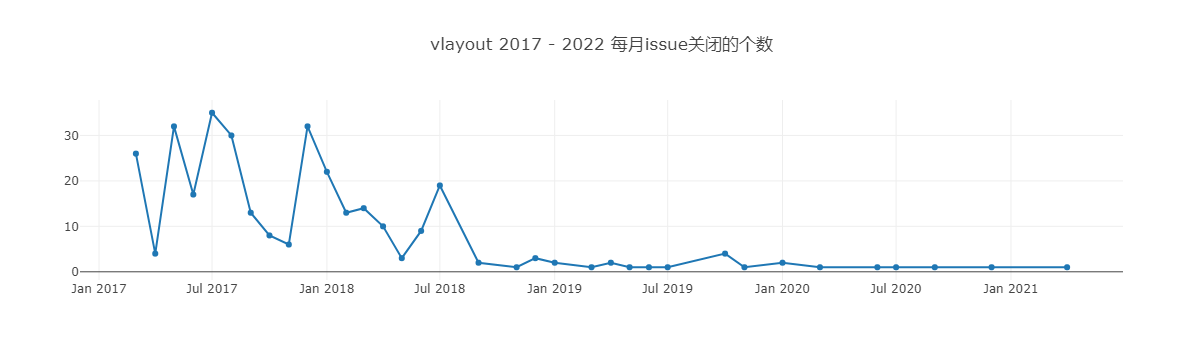

In [8]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='IssuesEvent'
    and action='closed'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月issue关闭的个数`});  
})

### 3.1 每月打开的PR个数

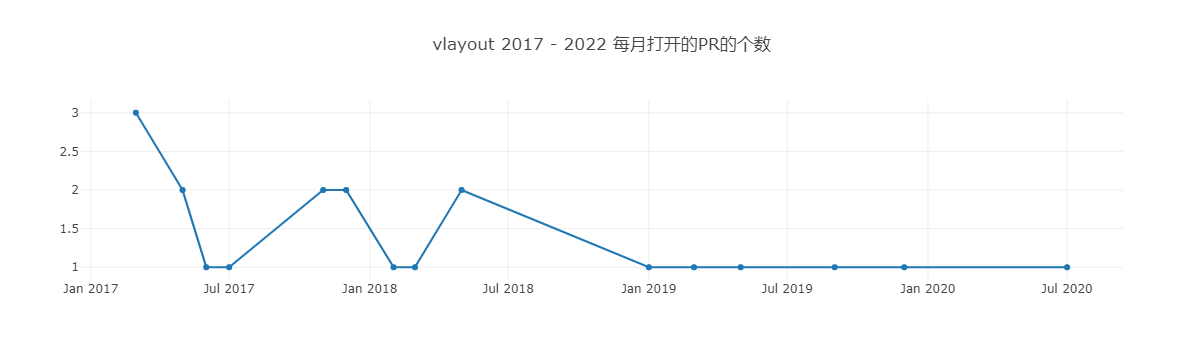

In [10]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='PullRequestEvent'
    and action= 'opened'
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月打开的PR的个数`});  
})

### 3.3 每月合入PR的个数

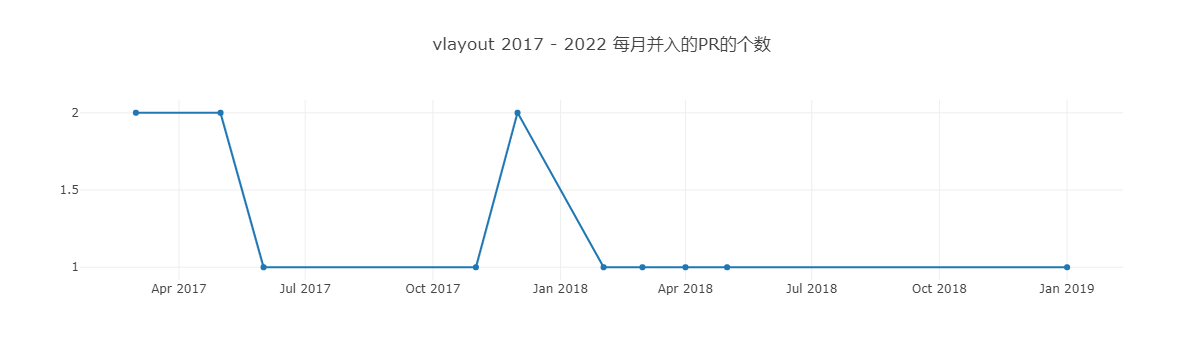

In [11]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(*) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type='PullRequestEvent'
    and pull_merged=1
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月并入的PR的个数`});  
})

### 4.1 没有仓库中活跃的不同开发者总数

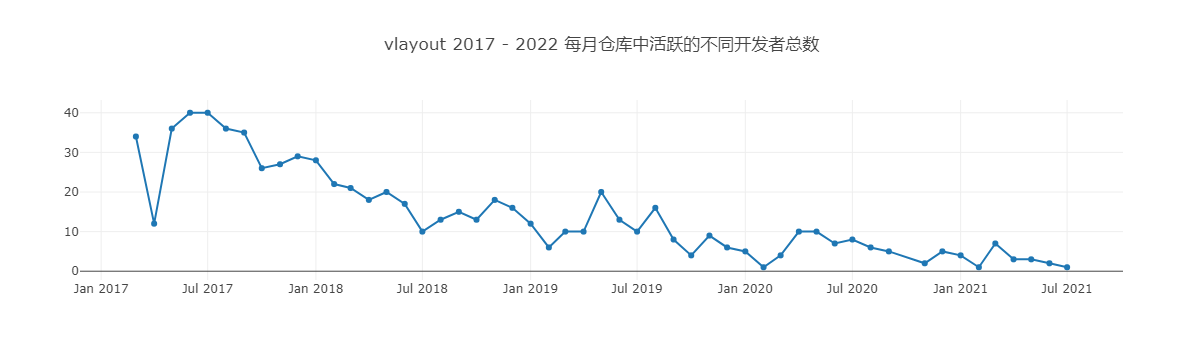

In [13]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m') as m, count(distinct actor_id) as cnt
    from github_log.year${year} 
    where repo_name = 'alibaba/vlayout'
    and type in ['IssueCommentEvent', 'IssuesEvent', 'PullRequestEvent', 'PullRequestReviewCommentEvent']
    group by formatDateTime(created_at, '%Y-%m')
    order by formatDateTime(created_at, '%Y-%m')
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.cnt), x: data1.map(d=>d.m), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} 每月仓库中活跃的不同开发者总数`});  
})

### 5.1 Issue从打开到关闭的平均时长

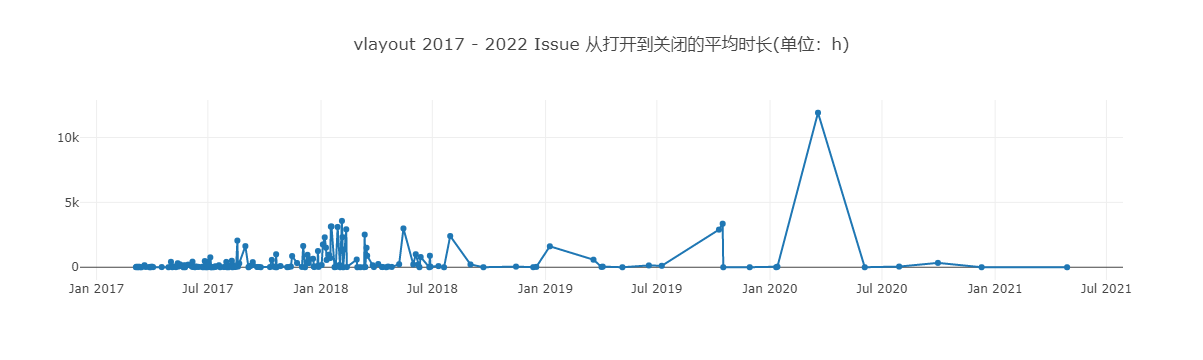

In [14]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, avg(round((issue_closed_at - issue_created_at)/3600, 2)) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssuesEvent'
    and action = 'closed'
    group by formatDateTime(created_at, '%Y-%m-%d')
    order by formatDateTime(created_at, '%Y-%m-%d') 
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} Issue 从打开到关闭的平均时长(单位：h)`});  
})

### 5.2 Issue从打开到关闭的时长中位数

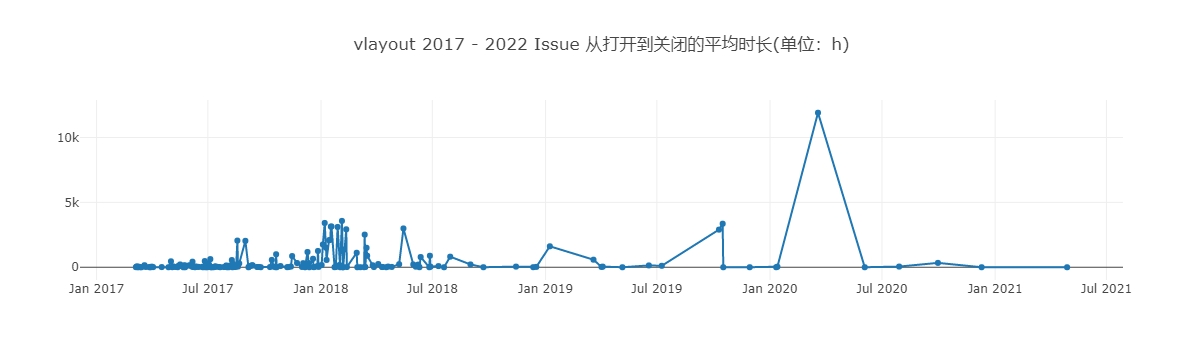

In [28]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, round((issue_closed_at - issue_created_at)/3600, 2) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssuesEvent'
    and action = 'closed
    order by formatDateTime(created_at, '%Y-%m-%d') 
    `)})
).then(
    data => {
    function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    // console.log(data3)
    openDigger.render.plotly([
        {y: data3.map(d => d.time), x: data3.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} Issue 从打开到关闭的时长中位数(单位：h)`});  
})

### 6.1 PR从开打到合入的平均时长

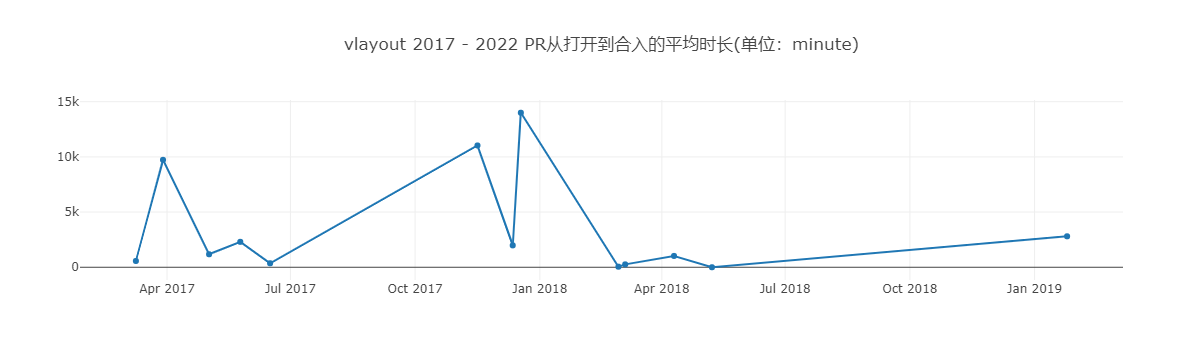

In [35]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, avg(round((issue_closed_at - issue_created_at)/60, 2)) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'PullRequestEvent'
    and pull_merged = 1
    group by formatDateTime(created_at, '%Y-%m-%d')
    order by formatDateTime(created_at, '%Y-%m-%d') 
    `)})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到合入的平均时长(单位：minute)`});  
})

### 6.2 PR从打开到合入时长的中位数

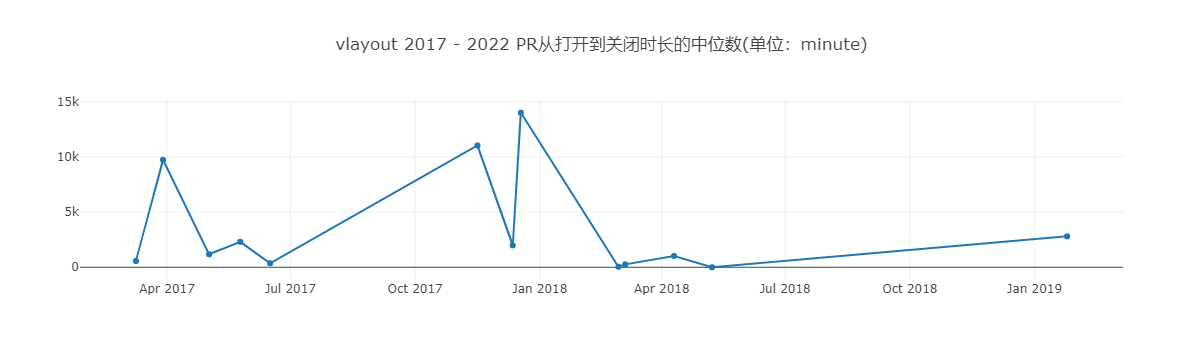

In [34]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, round((issue_closed_at - issue_created_at)/60, 2) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'PullRequestEvent'
    and pull_merged = 1
    order by formatDateTime(created_at, '%Y-%m-%d')  
    `)})
).then(
    data => {
    function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    // console.log(data3)
    openDigger.render.plotly([
        {y: data3.map(d => d.time), x: data3.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到关闭时长的中位数(单位：minute)`});  
})

### 7.1 Issue从打开到第一次有人回复的平均时长

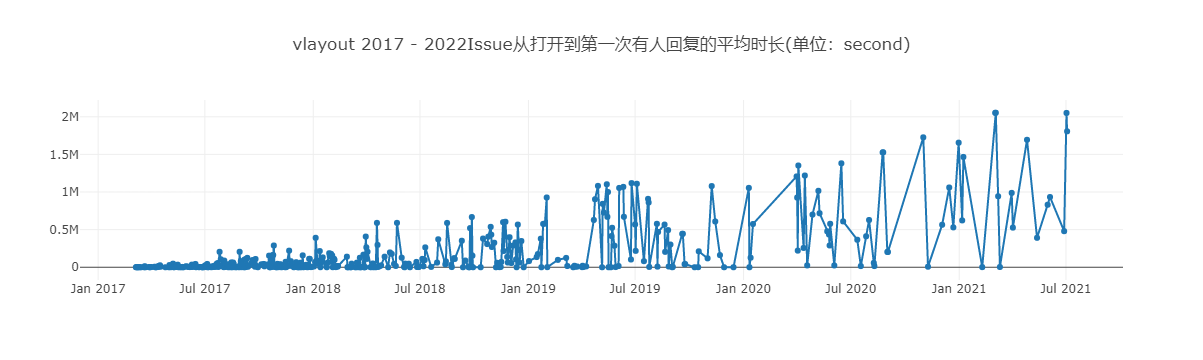

In [24]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select day, round(avg(time)/60, 2) time
    from 
    (
    select issue_id, formatDateTime(created_at, '%Y-%m-%d') day, min(issue_comment_created_at - issue_created_at) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssueCommentEvent'
    and issue_comment_id != '0'

    group by formatDateTime(created_at, '%Y-%m-%d'), issue_id
    order by formatDateTime(created_at, '%Y-%m-%d') 
    )
    group by day
    order by day
    `                                                          
    )})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear}Issue从打开到第一次有人回复的平均时长(单位：second)`});  
})

### 7.2 Issue从打开到第一次有人回复时长的中位数

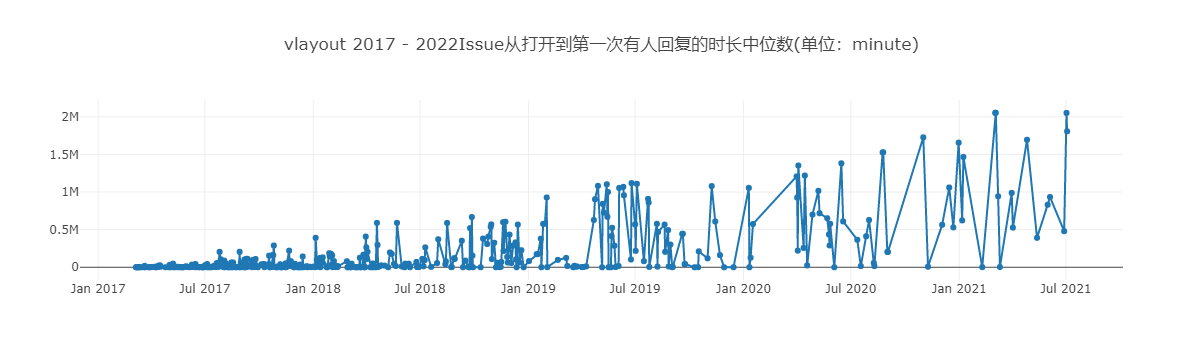

In [41]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(
    `
    select issue_id, formatDateTime(created_at, '%Y-%m-%d') day, round(min(issue_comment_created_at - issue_created_at)/60,2) time
    from github_log.year${year}
    where repo_name = 'alibaba/vlayout'
    and type = 'IssueCommentEvent'
    and issue_comment_id != '0'
    group by formatDateTime(created_at, '%Y-%m-%d'), issue_id
    order by formatDateTime(created_at, '%Y-%m-%d'), time 
    `                                                          
    )})
).then(
    data => {
    function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    // console.log(data3)
    openDigger.render.plotly([
        {y: data3.map(d => d.time), x: data3.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear}Issue从打开到第一次有人回复的时长中位数(单位：minute)`});  
})

### 7.3 PR从打开到第一次有人回复的平均时长

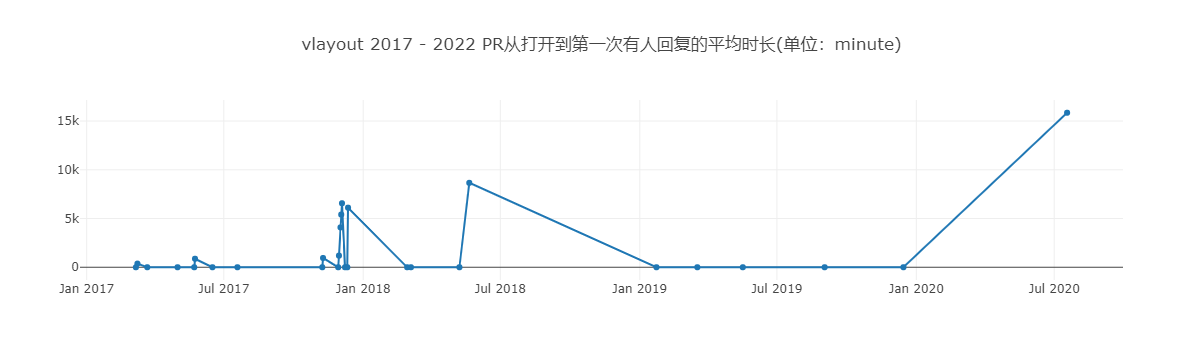

In [39]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(`
    select formatDateTime(created_at, '%Y-%m-%d') day, round(min(a.created_at - b.created_at)/60, 2) time
    from github_log.year${year} a
    right join 
    (
        select distinct issue_number, created_at 
        from github_log.year${year}
        where repo_name = 'alibaba/vlayout'
        and type = 'PullRequestEvent'
        and action = 'opened'
    ) b
    ON a.issue_number =  b.issue_number
    and a.repo_name = 'alibaba/vlayout'
    and a.type = 'IssueCommentEvent'
    group by formatDateTime(a.created_at, '%Y-%m-%d')
    order by formatDateTime(a.created_at, '%Y-%m-%d')
    `                                                          
    )})
).then(
    data => {
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到第一次有人回复的平均时长(单位：minute)`});  
})

### 7.4 PR从打开到第一次有人回复的平均时长

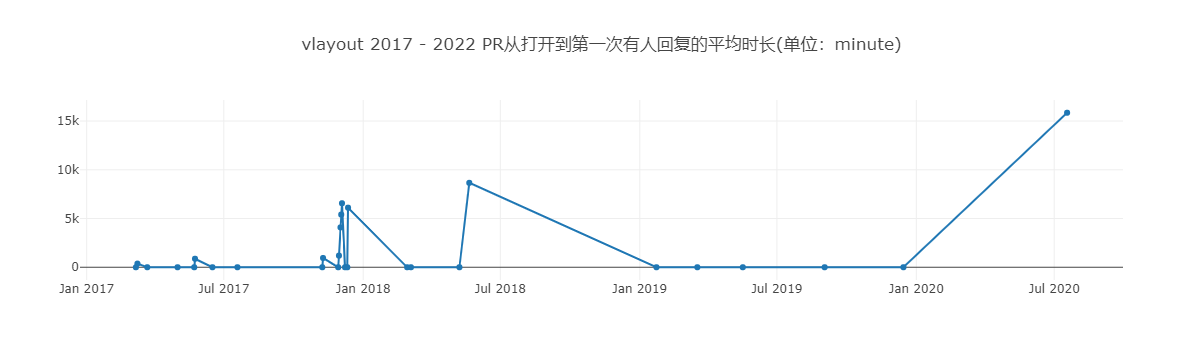

In [40]:
var startYear = 2017, endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
    years.map(year => { return openDigger.driver.clickhouse.query(
    `
    select formatDateTime(created_at, '%Y-%m-%d') day, round(min(a.created_at - b.created_at)/60, 2) time
    from github_log.year${year} a
    right join 
    (
        select distinct issue_number, created_at 
        from github_log.year${year}
        where repo_name = 'alibaba/vlayout'
        and type = 'PullRequestEvent'
        and action = 'opened'
    ) b
    ON a.issue_number =  b.issue_number
    and a.repo_name = 'alibaba/vlayout'
    and a.type = 'IssueCommentEvent'
    group by formatDateTime(a.created_at, '%Y-%m-%d')
    order by formatDateTime(a.created_at, '%Y-%m-%d')
    `                                                          
    )})
).then(
    data => {
     function sortArr(arr, str) {
        var _arr = [],
            _t = [],
            // 临时的变量
            _tmp;
        // 按照特定的参数将数组排序将具有相同值得排在一起
        arr = arr.sort(function(a, b) {
            var s = a[str],
                t = b[str];
            return s < t ? -1 : 1;
        });

        if ( arr.length ){
            _tmp = arr[0][str];
        }
        // 将相同类别的对象添加到统一个数组
        for (var i in arr) {
            if ( arr[i][str] === _tmp ){
                _t.push(arr[i]);
            } else {
                _tmp = arr[i][str];
                _arr.push(_t);
                _t = [arr[i]];
            }
        }
        // 将最后的内容推出新数组
        _arr.push( _t );
        return _arr;
    }
        
    function midNumber(binDimArr){
        var _arr = []
        var _tmp
        for (var i in binDimArr){
            var length = binDimArr[i].length
            if(length % 2 == 0){
                _tmp = binDimArr[i][Math.floor(length/2)]
                _tmp.time = (binDimArr[i][Math.floor(length/2)].time + binDimArr[i][Math.floor(length/2) - 1].time)/2
                _arr.push(_tmp)
            }else{
                _arr.push(binDimArr[i][Math.floor(length/2)])            
            }
        }
        return _arr
    }
    // console.log(data);
    data1 = data.reduce(function (a, b) { return a.concat(b)} );
    // console.log(data1)
    data2 = sortArr(data1, 'day')
    // console.log(data2)
    data3 = midNumber(data2)
    // console.log(data3)
    openDigger.render.plotly([
        {y: data1.map(d => d.time), x: data1.map(d=>d.day), mode: 'lines+markers', name: 'activity'}
    ], {title: `vlayout ${startYear} - ${endYear} PR从打开到第一次有人回复时长中位数(单位：minute)`});  
})